In [1]:
from tools import *
from config import *

ModuleNotFoundError: No module named 'GNN'

In [2]:
k_days = 7
scale = 30

exp = f'inference/firepoint/2x2/train/default/check_z-score/full_{k_days}_{scale}_700/baseline/'
features = read_object('relevant_features_risk.pkl', path=Path(exp))
features_name, _ = get_features_name_list(scale, train_features)
if k_days > 0:
    for k in range(1, k_days + 1):
            new_fet = [v+'_'+str(k) for v in varying_time_variables]
            train_features += [nf for nf in new_fet if nf.split('_')[0] in train_features]
            features_name, newShape = get_features_name_list(scale, train_features)
log_features(features, features_name)

2024-08-13 14:37:26,518 [INFO ]  inference/firepoint/2x2/train/default/check_z-score/full_7_30_700/baseline/relevant_features_risk.pkl not found


TypeError: get_features_name_list() missing 1 required positional argument: 'methods'

In [1]:
import socket

def get_machine_info():
    try:
        # Obtenir le nom d'hôte de la machine
        hostname = socket.gethostname()
        print(f"Nom de l'hôte : {hostname}")

        # Obtenir l'adresse IP locale
        local_ip = socket.gethostbyname(hostname)
        print(f"Adresse IP locale : {local_ip}")
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

    return hostname


get_machine_info()

Nom de l'hôte : caron-Precision-7780
Adresse IP locale : 127.0.1.1


In [3]:
exp = f'test_geometry/firepoint/2x2/train/2D_database'
departement = 'departement-01-ain'
date = 300
features_name, _ = get_features_name_lists_2D(6, features)
print(allDates[date])
sample = read_object(f'X_{date}.pkl', path=Path(exp) / departement)
sample.shape

2018-04-08


(101, 45, 51)

In [3]:
features_name

['temp',
 'dwpt',
 'rhum',
 'prcp',
 'wdir',
 'wspd',
 'prec24h',
 'dc',
 'ffmc',
 'dmc',
 'nesterov',
 'munger',
 'kbdi',
 'isi',
 'angstroem',
 'bui',
 'fwi',
 'dailySeverityRating',
 'temp16',
 'dwpt16',
 'rhum16',
 'prcp16',
 'wdir16',
 'wspd16',
 'prec24h16',
 'days_since_rain',
 'sum_consecutive_rainfall',
 'sum_rain_last_7_days',
 'sum_snow_last_7_days',
 'snow24h',
 'snow24h16',
 'elevation',
 'population',
 'NDVI',
 'NDMI',
 'NDBI',
 'NDSI',
 'NDWI',
 'highway_encoder',
 'foret_encoder',
 '12',
 'PasDeforet',
 'Châtaignier',
 'Chênes décidus',
 'Conifères',
 'Douglas',
 'Feuillus',
 'Hêtre',
 'Mixte',
 'Mélèze',
 'NC',
 'NR',
 'Peuplier',
 'Pin autre',
 'Pin laricio, pin noir',
 'Pin maritime',
 'Pin sylvestre',
 'Pins mélangés',
 'Robinier',
 'Sapin, épicéa',
 'PasDeRoute',
 'motorway',
 'primary',
 'secondary',
 'tertiary',
 'path',
 'water',
 'tree',
 'grass',
 'crops',
 'shrub',
 'flooded',
 'built',
 'bare',
 'snow',
 'month',
 'dayofyear',
 'dayofweek',
 'isweekend',
 'c

In [7]:
sample.dtype

dtype('float64')

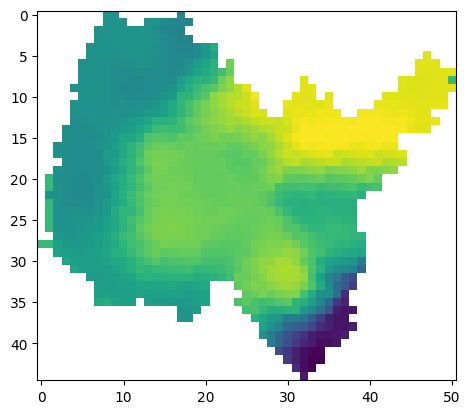

In [6]:
plt.imshow(sample[features_name.index('temp')])

In [ ]:
sample = read_object(f'Y_{date}.pkl', path=Path(exp) / departement/ str(scale) /  'influence')

2017-12-25
2024-08-20 10:11:12,208 [INFO ]  inferene/firepoint/2x2/train/2D_database/departement-01-ain/3/influence/Y_196.pkl not found


TypeError: Image data of dtype object cannot be converted to float

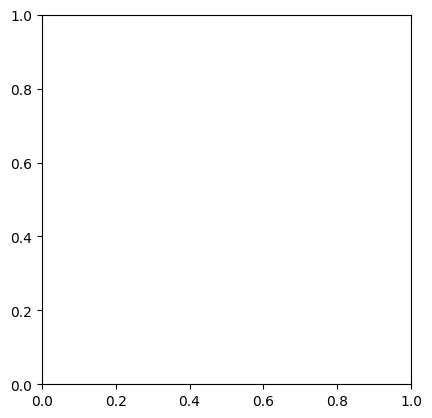

In [5]:
exp = f'inferene/firepoint/2x2/train/2D_database/'
departement = 'departement-01-ain'
scale = 3
date = 196
features_name, _ = get_features_name_lists_2D(6, features)
print(allDates[date])
sample = read_object(f'Y_{date}.pkl', path=Path(exp) / departement/ str(scale) / 'influence')
plt.imshow(sample)